In [1]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

import weightedcalcs as wc


In [2]:
def create_grid(df,x,y,z):
    # 2D-arrays from DataFrame
    x1 = np.linspace(df[x].min(), df[x].max(), len(df[x].unique()))

    y1 = np.linspace(df[y].min(), df[y].max(), len(df[y].unique()))


    x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
    z2 = griddata((df[x], df[y]), df[z], (x2, y2), method='linear')
    
    return x2, y2, z2

In [22]:
hh = pd.read_csv("./output/household_data_pre_fg.csv")

In [23]:
hh

,income,weights,homeshare,home_choice,consumption
0,0.397250,0.008970,0.998873,0.998873,0.303248
1,0.394876,0.007035,0.997023,0.997094,0.396913
2,0.392502,0.004168,0.994807,0.995407,0.443129
3,0.390128,0.001766,0.993585,0.994408,0.482740
4,0.387755,0.001239,0.991948,0.993146,0.512995
...,...,...,...,...,...
995,3.208933,0.000340,0.811538,0.831056,3.237955
996,3.206560,0.000731,0.810528,0.826943,3.331420
997,3.204186,0.000177,0.808950,0.822407,3.424713
998,3.201812,0.000203,0.806884,0.817512,3.517788


In [6]:
calc = wc.Calculator("weights")

In [ ]:
income_type = "asset"

foo = hh[((hh[income_type] <= calc.quantile(hh, income_type, 0.25)) )];

print("Bottom Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))

print(" ")
print("Median Trade Share")
print(round(1 - calc.median(hh,"homeshare"), 4))

foo = hh[((hh[income_type] > calc.quantile(hh, income_type, 0.75)) )]

print(" ")
print("Top Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))

## Fix prices, let the trade cost adjust...

In [26]:
hhpost = pd.read_csv("./output/household-data-US-CAN-fix-p-fg.csv")

welfare = pd.read_csv("./output/welfare-US-CAN-fix-p-fg.csv")

hhpost = pd.merge(hhpost, welfare[["welfare", "asset", "shock"]], left_index = True, right_index = True)

In [28]:
hhpost

,income,weights,homeshare,home_choice,consumption,welfare,asset,shock
0,0.397250,0.008965,0.996360,0.996360,0.303248,0.152676,-2.00000,1.0
1,0.394876,0.007033,0.991850,0.992048,0.396736,0.155368,-1.89899,1.0
2,0.392502,0.004175,0.987635,0.988864,0.443049,0.158313,-1.79798,1.0
3,0.390128,0.001778,0.985139,0.986800,0.482584,0.160641,-1.69697,1.0
4,0.387755,0.001240,0.982407,0.984643,0.512933,0.163341,-1.59596,1.0
...,...,...,...,...,...,...,...,...
995,3.208933,0.000288,0.779282,0.796388,3.231314,0.521081,7.59596,10.0
996,3.206560,0.000762,0.778328,0.791947,3.322428,0.521907,7.69697,10.0
997,3.204186,0.000181,0.776800,0.787066,3.413196,0.522762,7.79798,10.0
998,3.201812,0.000211,0.772919,0.781924,3.512512,0.523529,7.89899,10.0


In [29]:
income_type = "asset"

foo = hhpost[((hhpost[income_type] <= calc.quantile(hhpost, income_type, 0.25)) )];

######## Guys at bottom
print("Bottom Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))
print(" ")
print("Bottom Welfare")
print(round(calc.median(foo,"welfare"),4))


######## Median
print(" ")
print("Median Trade Share")
print(round(1 - calc.median(hhpost,"homeshare"), 4))
print(" ")
print("Median Welfare")
print(round(calc.median(hhpost,"welfare"),4))

foo = hhpost[((hhpost[income_type] >= calc.quantile(hhpost, income_type, 0.75)) )];

######## Top
print(" ")
print("Top Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))
print(" ")
print("Top Welfare")
print(round(calc.median(foo,"welfare"),4))


######## Aggregate 
print(" ")
print("Aggregate Welfare")
print(round(calc.mean(hhpost,"welfare"),4))

foo = hhpost[(hhpost.welfare <= 0.0 )];

print(" ")
print("Share who Loose")
print(round(foo.weights.sum(),4))
print(round(calc.mean(foo,"asset"),4))

Bottom Quartile Trade Share
0.0341
 
Bottom Welfare
0.2095
 
Median Trade Share
0.0783
 
Median Welfare
0.2867
 
Top Quartile Trade Share
0.1367
 
Top Welfare
0.3942
 
Aggregate Welfare
0.3015
 
Share who Loose
0.0
nan


C:\Users\irmew01\Anaconda3\lib\site-packages\weightedcalcs\core.py:64: RuntimeWarning: invalid value encountered in double_scalars
  return (values * weights).sum() / total_weight


This is what should be expected. It's cheaper to buy stuff...so everybody wins. Some win more than others --- poor guys care less about autralia than rich guys, but everyone would agree that this is good. Also notice that the winners are only 5x larger than small winners.

---

### Let prices adjust

So now R, w will change. 

Side note: Recall that w and R have to move to (i) make sure supply of goods equalls world demand and this is modulated by the price at which goods are supplied at and (ii) that asset demand within a country equalls asset supply (and this would be modulated by R). These things do have to work in concert...but this is the demarcation.

In [32]:
hhpost = pd.read_csv("./output/household-data-US-CAN-ge-fg.csv")

welfare = pd.read_csv("./output/welfare-US-CAN-ge-fg.csv")

hhpost = pd.merge(hhpost, welfare[["welfare", "asset", "shock"]], left_index = True, right_index = True)

In [33]:
income_type = "asset"

foo = hhpost[((hhpost[income_type] <= calc.quantile(hhpost, income_type, 0.25)) )];

######## Guys at bottom
print("Bottom Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))
print(" ")
print("Bottom Welfare")
print(round(calc.median(foo,"welfare"),4))


######## Median
print(" ")
print("Median Trade Share")
print(round(1 - calc.median(hhpost,"homeshare"), 4))
print(" ")
print("Median Welfare")
print(round(calc.median(hhpost,"welfare"),4))

foo = hhpost[((hhpost[income_type] >= calc.quantile(hhpost, income_type, 0.75)) )];

######## Top
print(" ")
print("Top Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))
print(" ")
print("Top Welfare")
print(round(calc.median(foo,"welfare"),4))


######## Aggregate 
print(" ")
print("Aggregate Welfare")
print(round(calc.mean(hhpost,"welfare"),4))

foo = hhpost[(hhpost.welfare <= 0.0 )];

print(" ")
print("Share who Loose")
print(round(foo.weights.sum(),4))
print(round(calc.mean(foo,"asset"),4))

Bottom Quartile Trade Share
0.0228
 
Bottom Welfare
0.065
 
Median Trade Share
0.0603
 
Median Welfare
0.0936
 
Top Quartile Trade Share
0.1151
 
Top Welfare
0.134
 
Aggregate Welfare
0.0988
 
Share who Loose
0.0
nan


C:\Users\irmew01\Anaconda3\lib\site-packages\weightedcalcs\core.py:64: RuntimeWarning: invalid value encountered in double_scalars
  return (values * weights).sum() / total_weight


Now prices have adjusted. The changes in W and R (and then behavior in response), guys at the bottom of the asset distribution loose, guys at the top win. And this is all amplified noticing that the GE gains are 16X for rich guys. And most don't like this shock. 

In [80]:
welfare

,asset,shock,welfare,welfare_level
0,-2.00000,1.0,0.002521,-0.001335
1,-1.89899,1.0,0.002547,-0.001335
2,-1.79798,1.0,0.002574,-0.001338
3,-1.69697,1.0,0.002598,-0.001341
4,-1.59596,1.0,0.002626,-0.001347
...,...,...,...,...
995,7.59596,10.0,0.026172,-0.008498
996,7.69697,10.0,0.026270,-0.008524
997,7.79798,10.0,0.026374,-0.008552
998,7.89899,10.0,0.026486,-0.008583


In [82]:
welfare

,asset,shock,welfare,welfare_level
0,-2.00000,1.0,-0.001490,0.000789
1,-1.89899,1.0,-0.000194,0.000102
2,-1.79798,1.0,0.000844,-0.000439
3,-1.69697,1.0,0.001605,-0.000828
4,-1.59596,1.0,0.002325,-0.001192
...,...,...,...,...
995,7.59596,10.0,0.022998,-0.007467
996,7.69697,10.0,0.023153,-0.007512
997,7.79798,10.0,0.023304,-0.007557
998,7.89899,10.0,0.023447,-0.007599


<ipython-input-36-6fc32c4cc5f8>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig("../notes/figures/welfare-jpn-ge.pdf", bbox_inches = "tight")


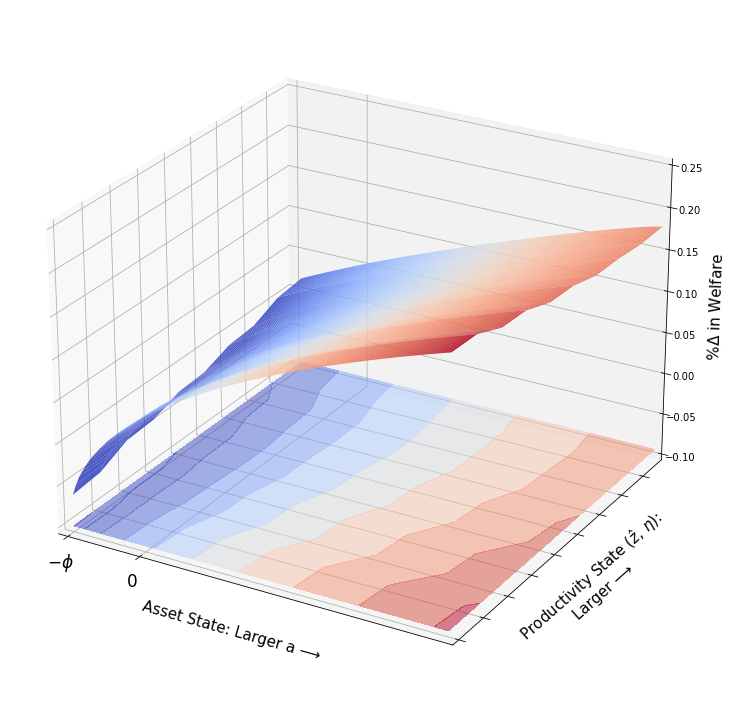

In [36]:
welfare = pd.read_csv("./output/welfare-US-JPN-ge-fg.csv")

x, y, z = create_grid(welfare,"asset","shock","welfare")

fig = plt.figure(figsize = [16.0,10], tight_layout = True)

#ax = fig.gca(projection='3d')

ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin=0, vmax=z.max()),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = -.10

ax.contourf(x, y, z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=0, vmax=z.max()), 
                 alpha = 0.50, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-2.05,8.05)
ax.set_xticks([-2, 0.0])
ax.set_xticklabels(["$-\phi$","0"], fontsize = 17)

ax.set_ylim(0.95,9.7)
ax.set_yticklabels([])

ax.set_zlim(-.10, 0.25)

ax.set_ylabel("\n Productivity State ($\hat z$, $\eta$):\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n %$\Delta$ in Welfare", fontsize = 15)

plt.savefig("../notes/figures/welfare-jpn-ge.pdf", bbox_inches = "tight")

plt.show()

<ipython-input-35-76b23fb1928a>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig("../notes/figures/welfare-jpn-fix-p.pdf", bbox_inches = "tight")


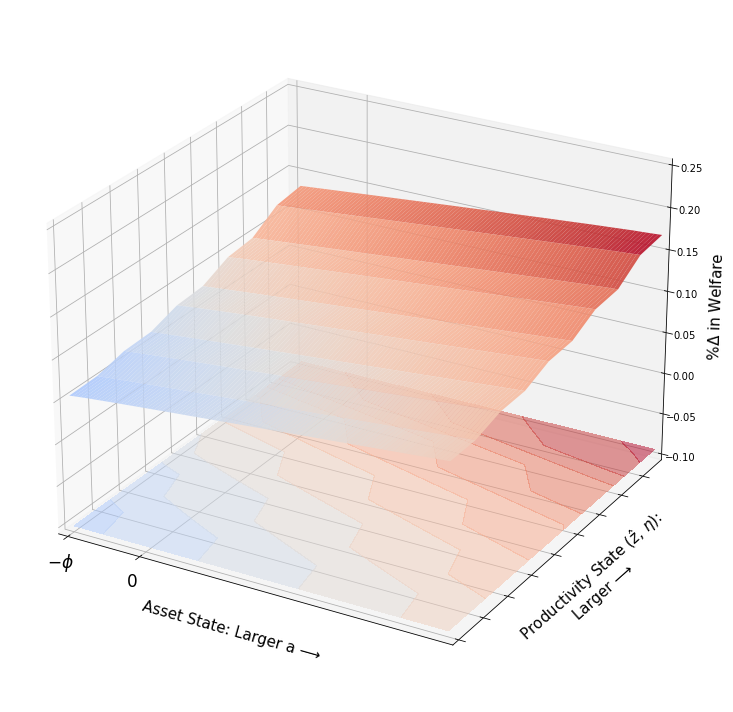

In [35]:
welfare = pd.read_csv("./output/welfare-US-JPN-fix-p-fg.csv")

x, y, z = create_grid(welfare,"asset","shock","welfare")

fig = plt.figure(figsize = [16.0,10], tight_layout = True)

#ax = fig.gca(projection='3d')

ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin=0.0, vmax=z.max()),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = -.10

ax.contourf(x, y, z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=0.0, vmax=z.max()), 
                 alpha = 0.50, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-2.05,8.05)
ax.set_xticks([-2, 0.0])
ax.set_xticklabels(["$-\phi$","0"], fontsize = 17)

ax.set_ylim(0.95,9.7)
ax.set_yticklabels([])

ax.set_zlim(-.10, 0.25)

ax.set_ylabel("\n Productivity State ($\hat z$, $\eta$):\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n %$\Delta$ in Welfare", fontsize = 15)

plt.savefig("../notes/figures/welfare-jpn-fix-p.pdf", bbox_inches = "tight")

plt.show()

<ipython-input-37-7564048f072c>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig("../notes/figures/welfare-can-fix-p.pdf", bbox_inches = "tight")


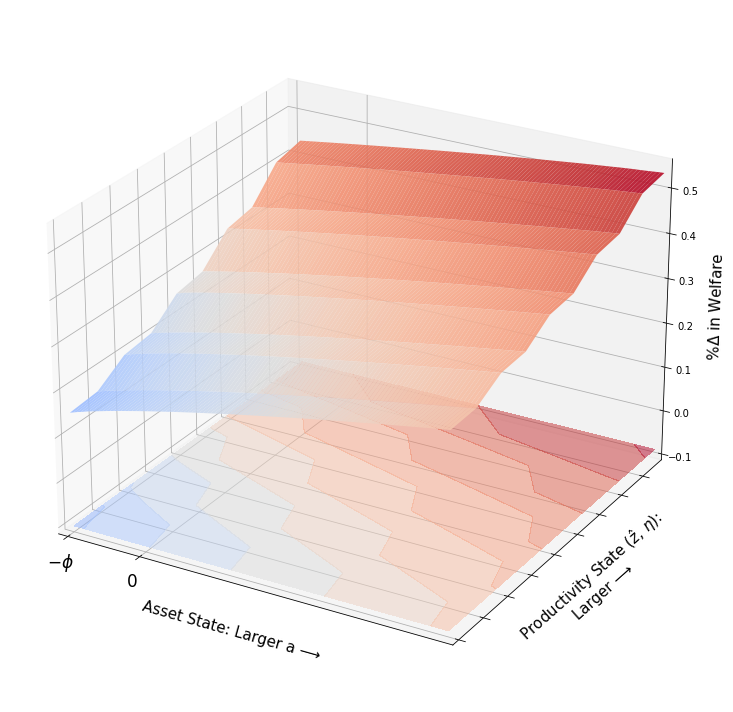

In [37]:
welfare = pd.read_csv("./output/welfare-US-CAN-fix-p-fg.csv")

x, y, z = create_grid(welfare,"asset","shock","welfare")

fig = plt.figure(figsize = [16.0,10], tight_layout = True)

#ax = fig.gca(projection='3d')

ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin=0, vmax=z.max()),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = -.10

ax.contourf(x, y, z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=0, vmax=z.max()), 
                 alpha = 0.50, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-2.05,8.05)
ax.set_xticks([-2, 0.0])
ax.set_xticklabels(["$-\phi$","0"], fontsize = 17)

ax.set_ylim(0.95,9.7)
ax.set_yticklabels([])

ax.set_zlim(-.10, 0.55)

ax.set_ylabel("\n Productivity State ($\hat z$, $\eta$):\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n %$\Delta$ in Welfare", fontsize = 15)

plt.savefig("../notes/figures/welfare-can-fix-p.pdf", bbox_inches = "tight")

plt.show()

<ipython-input-38-97c8e1e76966>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig("../notes/figures/welfare-can-ge.pdf", bbox_inches = "tight")


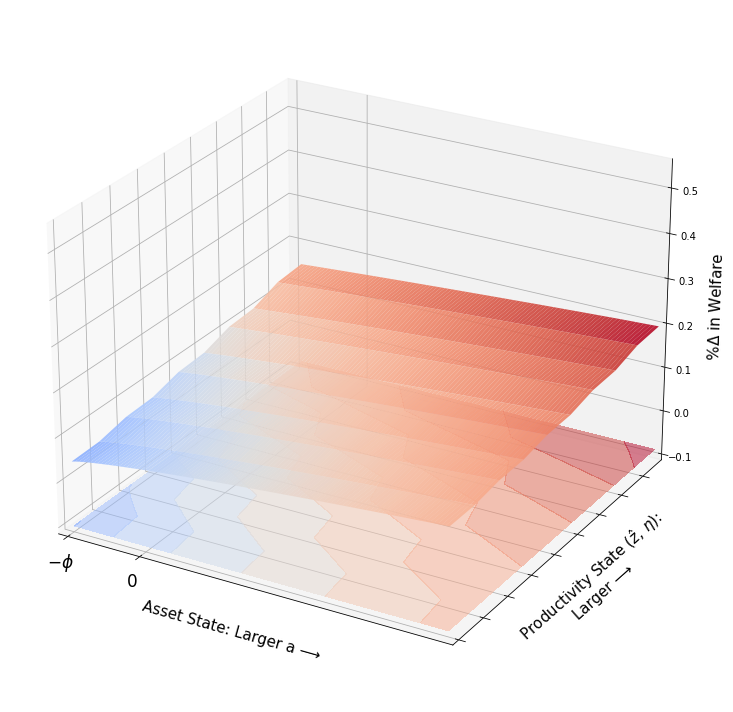

In [38]:
welfare = pd.read_csv("./output/welfare-US-CAN-ge-fg.csv")

x, y, z = create_grid(welfare,"asset","shock","welfare")

fig = plt.figure(figsize = [16.0,10], tight_layout = True)

#ax = fig.gca(projection='3d')

ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin=0, vmax=z.max()),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = -.10

ax.contourf(x, y, z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=0, vmax=z.max()), 
                 alpha = 0.50, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-2.05,8.05)
ax.set_xticks([-2, 0.0])
ax.set_xticklabels(["$-\phi$","0"], fontsize = 17)

ax.set_ylim(0.95,9.7)
ax.set_yticklabels([])

ax.set_zlim(-.10, 0.55)

ax.set_ylabel("\n Productivity State ($\hat z$, $\eta$):\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n %$\Delta$ in Welfare", fontsize = 15)

plt.savefig("../notes/figures/welfare-can-ge.pdf", bbox_inches = "tight")

plt.show()